#

# Ejercicio de programación 7:
# Agrupamiento K-means  y Análisis de Componentes Principales

## Introducción

En este ejericio, implementará el algoritmo de agrupamiento K-means y lo aplicará en la compresión de imágenes.
En la segunda parte, usará análisis de componentes principales para encontrar una representación en baja dimensión
de imágenes de caras.

Toda la información que necesita para resolver este ejercicio está contenida en este cuaderno y el código
que debe completar se debe hacer dentro de este cuaderno.

Antes de comenzar, necesita importar las librerias que necesita. Estas son

* [`numpy`](http://www.numpy.org/) para operaciones entre arreglos y matrices (tensores)
* [`matplotlib`](https://matplotlib.org/) para graficar y
* [`scipy`](https://docs.scipy.org/doc/scipy/reference/) para computación científica.

In [ ]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Import regular expressions to process emails
import re

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

from IPython.display import HTML, display, clear_output

try:
    pyplot.rcParams["animation.html"] = "jshtml"
except ValueError:
    pyplot.rcParams["animation.html"] = "html5"

# Optimization module in scipy
from scipy import optimize

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat

# library written for this exercise providing additional functions for assignment submission, and others
import utils

%load_ext autoreload
%autoreload 2

# define the submission/grader object for this exercise
# grader = utils.Grader()

# tells matplotlib to embed plots within the notebook
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1 K-means Clustering: Agrupamiento mediante K-means

En este ejercicio, implementará el algorimo de K-means y lo usará para la compresión de imágenes.
Primero comienza con un conjunto de datos 2D que le ayudará a ganar intuición acerca de como trabaja el
algoritmo de K-means. Luego, usará el algoritmo de K-means para la compresión de imágenes mediante la reducción
del número de colores que ocurren en una imagen. Solo los colores más sobresalientes de la misma.

### 1.1 Implementación de K-means
El algoritmo de K-means es un método para agrupar automáticamente datos de acuerdo a su similitud. Concretameinte,
dado un conjunto  de datos $\{x^{(1)} , \cdots, x^{(m)}\}$ (donde $x^{(i)} \in \mathbb{R}^n$), se requieren formar
grupos de forma cohesiva. La intuición detrás de K-means consiste en un proceso iterativo, el cual comienza mediante
una solución inicial aleatoria de centroidees, luego se refina esta solución inicial repetidamente obteniendo ejemplos
donde los datos están más cerca a sus centroides, los cuales se recalculan en cada iteración.

El algorimo K-means se puede entender como sigue:

```python
centroids = kMeansInitCentroids(X, K)
for i in range(iterations):
    # Cluster assignment step: Assign each data point to the
    # closest centroid. idx[i] corresponds to cˆ(i), the index
    # of the centroid assigned to example i
    idx = findClosestCentroids(X, centroids)
    
    # Move centroid step: Compute means based on centroid
    # assignments
    centroids = computeMeans(X, idx, K)
```

El ciclo interno del algoritmo repite cada vez dos pasos: (1) Asigna una muestra de entrenamiento $x^{(i)}$
al centroide mas cercano, y (2) recalcula la media de cada centroide usando los puntos asigados al mismo.
El algoritmo K-means siempre converge a un conjunto final de centroides, junto con sus puntos asignados, vecinos
de cada centroide. La solución a la que converge el algoritmo no necesariamente es la ideal. Por eso, en la práctica,
K-means se corre solo unas pocas veces con inicializaciones aleatorias diferentes. Una forma de escoger entre
dos soluciones diferentes, es usando una función de costo (distorción), la cual se debe minimizar.
Usted debe implementar las dos fases del algoritmo de forma separada en la próxima sección.

<a id="section1"></a>
#### 1.1.1 Encontrar los centroides mas cercanos

En la fase de "asignamiento de grupo" el algoritmo de K-means asigna cada muestra de entrenamiento $x^{(i)}$
a su centroide mas cercano, dadas las posiciones de los centroides. Específicamente, para cada muetra $i$
asignamos


$$c^{(i)} := j \quad \text{que minimiza} \quad \lvert\rvert x^{(i)} - \mu_j  \lvert\rvert^2, $$

donde $c^{(i)}$  es el índice del centroide que está más cercano a $x^{(i)}$, y  $\mu_j$ es la posición (valor=
de el centroide $j^{écimo}$. Note que $c^{(i)}$ corresponde al  `idx[i]` en el código de inicio.

Su tarea es completar el código en la función `findClosestCentroids`. Esta función toma la matrix de datos ´X'
y las localizaciones de todos los centroides dentro de  `centroids` y debería arrojar un arreglo unidimensional
`idx` que contiene el índice (un valor en el conjunto $\{1, ..., K\}, donde $K$ es el número total de centroides)
del centroide mas cercano a cada muestra de entrenamiento.

Usted puede implementar esto usando un ciclo por cada muestra de entrenamiento y cada centroide.
<a id="findClosestCentroids"></a>

In [ ]:
def findClosestCentroids(X, centroids):
    """
    Calcula el centroide asignado para cada muestra.

    Parámetros:
    ----------
    X : Arreglo
        Los datos de tamaño (m,n) donde cada fila es una muestra.
        Es decir, tenemos m muestras y n dimensiones.

    centroids: arreglo
        Los centroides de K-means de tamaño (K, n). K es el
        número de grupos, y n es la dimensión de lo los datos.

    Retorna
    -------
    idx : arreglo
        Un vector de tamaño (m, ) que contiene los centroides asignados para cada muestra
        (fila) en los datos X.

    Instructiones
    ------------
    Visite cada muestra, encuentre el centroide más cercano, y
    almacene el índice en `idx` donde le corresponde.
    Concretameinte, idx[i] debería contener el índice del centroide
    más cercano a la muestra i. Por esto debe ser un valor en el
    rango 0..K-1


    Nota
    ----
    Usted puede usar un ciclo for sobre las muestras para calcular esto.
    """
    # asigne K
    K = centroids.shape[0]

    # debe retornar estos valores correctamente
    idx = np.zeros(X.shape[0], dtype=int)

    # ====================== Su Código Acá =======================

    for i in np.arange(idx.size):

        J = np.sqrt(np.sum(np.square(X[i] - centroids), axis = 1))

        idx[i] = np.argmin(J)

    # =============================================================
    return idx

Una vez usted halla completado el código en  `findClosestCentroids`, la siguiente celda debe
producir la salida  `[0 2 1]` correspondiente a las asignaciones de los 3 primeras muestras.

In [ ]:
# Cargue los datos
data = loadmat(os.path.join('Data', 'ex7data2.mat'))
X = data['X']

# Select los tres centroides iniciales
K = 3   # 3 centroides
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

# Encuentre los centroides mas cercanos a las muestras usando los centroides iniciales.
idx = findClosestCentroids(X, initial_centroids)

print('Closest centroids for the first 3 examples:')
print(idx[:3])
print('(the closest centroids should be 0, 2, 1 respectively)')

Closest centroids for the first 3 examples:
[0 2 1]
(the closest centroids should be 0, 2, 1 respectively)


<a id="section2"></a>
### 1.1.2 Calculo de los centroides (medias)

Dadas las asignaciones de cada punto a un centroide, la segunda fase del algoritmo recalcula las medis para
cada centroide. Esta centroide corresponde a la media de los puntos asignados al mismo. Específicamente,
para cada centroide $k$ en el conjunto

$$ \mu_k := \frac{1}{\left| C_k\right|} \sum_{i \in C_k} x^{(i)}$$

Donde  $C_k$ es el conjunto de muestras asignadas al centroide $k$. Concretamente, si do muestras, por ejemplo,
 $x^{(3)}$ y $x^{(5)}$ son asignadas al centroide  $k = 2$, entondces usted debería actualizar
  $\mu_2 = \frac{1}{2} \left( x^{(3)} + x^{(5)} \right)$.


Usted ahora debe completar el código en la función  `computeCentroids`. Debe implementar esta función mediante
un ciclo sobre los centroides. Tambien puede usar un ciclo sobre las muestras; pero si quiere usar una implementación
vectorizada que no contenga este ciclo, su programa será más rápido.

<a id="computeCentroids"></a>

In [ ]:
def computeCentroids(X, idx, K):
    """
    Retorna los nuevos centroides calculando las medias sobre los
    puntos asignados a aca centroide.

    Parámetros
    ----------
    X : arreglo
        Los datos donde cada fila es una muestra. Es decir,
        es una matriz de tamaño (m, n) con m puntos y cada
        punto con n dimensiones.

    idx : arreglo
        Un vector (tamaño m= con las asignaciones de los centroides (es decir, cada entrada
        en el rango  [0 ... K-1]) para cada muestra.


    K : int
        Número de grupos (clusters)

    Retorna
    -------
    centroids : arreglo
        Una matriz de tamaño (K, n) donde cada fila es la media de los puntos
        asignados al centroide.

    Instrucciones
    ------------
    Visite cada centroide y calcule la media de todos los
    puntos asignados a él. Concretamente, el vector fila de
    centroids[i, :] debe contener la media de los datos
    asignaos al grupo i.

    Nota:
    -----
    Usted puede usar un ciclo for sobre los centroides para calcular esto.
    """
    # variables útiles
    m, n = X.shape
    # necesita retornar lo siguiiente correctamente.
    centroids = np.zeros((K, n))

    # ====================== Su Código Acá ======================

    centroids=np.array([ np.mean(X[idx == i], axis = 0) for i in np.arange(K)] )

    # =============================================================
    return centroids

Una vez halla completado el código en  `computeCentroids`, la siguiente celda debe retornar los
centroides luego del primer paso de K-means.

In [ ]:
# Calcule mas medias basado en el centroide mas cercano encontrado arriba.
centroids = computeCentroids(X, idx, K)

print('Centroides calculados luego de encontrar los centroides más cercanos: ')
print(centroids)
print('\nThe centroids should be')
print('   [ 2.428301 3.157924 ]')
print('   [ 5.813503 2.633656 ]')
print('   [ 7.119387 3.616684 ]')

Centroides calculados luego de encontrar los centroides más cercanos: 
[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]

The centroids should be
   [ 2.428301 3.157924 ]
   [ 5.813503 2.633656 ]
   [ 7.119387 3.616684 ]


### 1.2 Ejemplo de K-means con datos

Luego  de haber completado las funciones (`findClosestCentroids` y `computeCentroids`),
debe tener todas las piezas necesarias para correr el algoritmo K-means.  La próxima celda corre el algoritmo
K-means on datos 2D de juguete con el fin de ayudarle a entender como trabaja K-means.  Sus funciones son llamadas
desde la función `runKmeans` ( en este proyecto la encontrará en el módulo `utils.py`).   Le sugerimos mirar la
función para que entienda como trabaja.  Note que el código llama las dos funciones que implementón en un ciclo.

Luego de que corra el próximo paso, el código K-means producirá una animación que se desplaza mostrando el progreso
del algoritmo en cada iteración.  Al final, su figura debe verse como la que se muestra debajo.
![](Figures/kmeans_result.png)

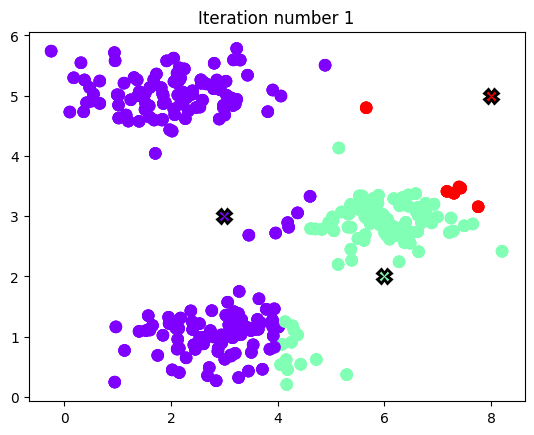

In [ ]:
# Carga los datos para el ejemplo
data = loadmat(os.path.join('Data', 'ex7data2.mat'))

# parametros para k-means
K = 3
max_iters = 10

# por consistencia, aca asignamos los centroides a valores especìficos
# sin embargo, en la práctica usted los debe generar de forma automática,
# por ejemplo creando muestras aleatorias (como se muestra en
# kMeansInitCentroids).
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])


# Corra el algoritmo K-means. El valor  'true'  al final es para graficar
# el progreso de K-means
centroids, idx, anim = utils.runkMeans(X, initial_centroids,
                                       findClosestCentroids, computeCentroids, max_iters, True)
anim

### 1.3 Inicialización aleatoria

Los centroides iniciales se para el ejemplo de la celda anterior fueron asignados para que usted vea
la misma figura que se muestra en la celda. En la práctica, una buena estrategia para inicialización de
centroides is la selección usando una función aleatoria para un conjunto de datos de entrenamiento.

In esta parde el ejercicio, usted debe completar la funcón   `kMeansInitCentroids`  con el siguiente código:


```python
# Inicialice los centroidos con muestras aleatorias

# Reordene de forma aleatoria los índices de las muestras
randidx = np.random.permutation(X.shape[0])
# Tome las primeras K muestras como centrroides
centroids = X[randidx[:K], :]
```

El código de arriba inicialmente permuta los índices aleatoriamente de las muestras (usando  `permute` del módulo `numpy.random` module).  Luego selecciona las primeras $K$ muestras basado en la permutación aleatoria de los
índices. Esto permite que las muestras sean seleccionadas aleatoriamente sin el riesgo de seleccionar una muestra
dos veces.  


*usted no necesita entregar esta parte del ejercicio*
<a id="kMeansInitCentroids"></a>

In [ ]:
def kMeansInitCentroids(X, K):
    """
    Esta función inicializa los K centroides que se usan para K-means en los datos x

    Parámetros
    ----------
    X : arreglo
        Datos de tamaño (m x n)

    K : int
        El número de grupos.

    Retorna
    -------
    centroids : arreglo
        Centroides de los grupos. ESta es una matriz de tamaño (K x n).

    Instrucciones
    ------------
    Usted debe iniciar los centroides aleatoriamente de los datos X.
    """
    m, n = X.shape

    # Este valor debe retornar correctamente.
    centroids = np.zeros((K, n))

    # ====================== Su Código Acá ======================

    randidx = np.random.permutation(X.shape[0])
    # Tome las primeras K muestras como centrroides
    centroids = X[randidx[:K], :]
    # =============================================================
    return centroids

### 1.4 Compresión de imágenes con K-means

En este ejercicio, usted aplica K-means para comprimir una imagen. Usaremos la imagen de abajo (propiedad de Frank Wouters
con  permiso para esta clase)


![](Data/bird_small.png)

En un formato directo de 24-bits de una imagen, cada pixel es representado por tres grupos de 8-bit enteros
sin signo (unsigned integers entre 0 y 255) que especifican los colores rojo (red), verde (green) y azul (blue).
A este formato se le conoce como RGB. Nuestra imagen contiene miles de colores, y en esta parte del ejercicio
usted va a reducir el numero de colores a 16.

Luego de esta reduccion es posible representar (en forma comprimida) la foto de forma eficiente. Específicamente,
usted solo necesita guardar los valores RGB de los 16 colores seleccionados, y para cada pixel en la imagen usted
solo necesita guardar el índice del color en esa localidad (donde solo 4 bits son necesarios para representar
16 posibilidades).

En este ejercicio usted usará el algoritmo de K-means para seleccionar
16 colores que serán usados para representar una imagen comprimida.
Concretamente, usted va a tratar cada pixel de la imagen original como una
muestra y usará el algoritmo de K-means para encontrar los 16 colores
que mejor agrupan los pixeles en un espacio RGB de tres dimensiones.
Una vez usted calcule los centroides en la imagen, empleará los 16 colores
para reemplazar los pixeles en la imagen original.

#### 1.4.1 pixeles en K-means

In Python, las imágenes se pueden leer como sigue

```python
# Cargue la imagen 128x128 en color (bird_small.png)
img = mpl.image.imread(os.path.join('Data', 'bird_small.png'))

# En este punto ya hemos importado la libreria matplotlib como mpl
```
Esto crea una matriz en tres dimensiones `A` donde los dos primeros
índices identifican una posición de pixel y de la cual el último índice
representa los colores rojo, verde, o azul. For ejemplo  A[50, 33, 2]
produce una intensidad de en el pixel con fila 51 y columna 35.

El código en la siguiente celda carga la imagen, y la reforma mediante
la creación de una matriz de m x 3 de colores de pixel (donde m=16384=128 x 129), y llama la su función K-means.

Luego de encontrar los K=16  colores más representativos de la imagen,
usted puede asignar cada posición de pixel al centroide más cercano
usando la función `findClosestCentroids`.  Esto permite que usted represente la imagen original usando las asignaciones de centroides para cada pixel.
Note que usted ha reducido significantemente el número de bits que son necesarios para describir la imagen.  La imagen original requirió 25 bits para cada una de las 128 x 128 localizaciones de pixeles, resultando en un
tamaño de 128 x 128 x 24 = 393,216 bits. La nueva representación requiere
un trabajo adicional de memoria en forma de un diccionario de 16 colores,
cada uno de los cuales requiere 24 bits, pero la imagen solo requiere 4 bits por ubicación de pixel.  El numero final de bits usado es entonces 16 x 24 + 128 x 128 x 4 = 65,920 bits, que corresponden a la imagen orignal comprimida por un factor de 6.

Finalmente, usted puede ver los efectos de la compresión mediante la
reconstrucción de la imagen basada solo en las asignaciones de centroides. Específicamente, usted puede reemplazar cada ubicación de pixel con
la media asignada. La figura siguiente muestra la reconstrucción obtenida.

![](Figures/bird_compression.png)



Aún cuando la imagen resultante retiene la mayoría de las características de la imagen original, se alcanzan a ver algunos artifactos de la compresión.

Correa la siguiente celta para calcular los centroides y la localización
de cada pixel en la imagen.

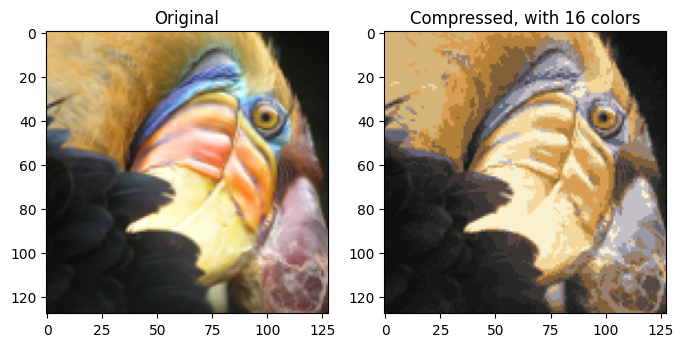

In [ ]:
# ======= Experimente con estos parámetros ================
# Por favor intente varios parámetros
K = 16
max_iters = 10

# Load an image of a bird
# cambie el nombre del archivo y directorio para experimentar con sus propias imágenes
A = mpl.image.imread(os.path.join('Data', 'bird_small.png'))
# ==========================================================

# Divida por 255 para que todos los valres queden entre 0 y 1.
A /= 255

# Reforme la imagen en una matriz Nx3 donde N=número de pixeles
# Cada fila debe contener los valores de los pixeles "Red, Green, Blue"
# La siguiente linea debe contener nuestra matriz X que usamos para K-means.
X = A.reshape(-1, 3)

# Cuando se usa K-means es importante inicializar los centroides aleatoriamente
# Usted debe completar el código KMeansInitCentroids antes de continuar.
initial_centroids = kMeansInitCentroids(X, K)

# Corra K-means
centroids, idx = utils.runkMeans(X, initial_centroids,
                                 findClosestCentroids,
                                 computeCentroids,
                                 max_iters)

# Ahora podemos recobrar la imagen desde los índices (idx) mapeando cada pixel
# (especificado por su índice idx) para el valor del centroide
# Reforme la imagen en las dimensiones adecuadas.
# We can now recover the image from the indices (idx) by mapping each pixel
# (specified by its index in idx) to the centroid value
X_recovered = centroids[idx, :].reshape(A.shape)

# Grafique la imagen original y escale (para recobrar la escala) por 255
fig, ax = pyplot.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(A*255)
ax[0].set_title('Original')
ax[0].grid(False)

# Grafique la imagen comprimida y escale (para recobrar la escala) por 255
ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed, with %d colors' % K)
ax[1].grid(False)

*Usted no necesita presentar esta parte del ejercicio*

### 1.5 Ejercicio opcional (no se califica) : Use su propia imagen

En este ejercicio, modifique su codigo para correrlo con una de sus imágenes. Observe que si su imagen es muy grande, entonces K-means
puede tomar mucho tiempo para correr. Recomendamos que cambie el
tamaño de su imagen de forma que sea apropiado para correr su código.
Tambien puede variar $K$ para ver los efectos de la compresión.

## 2 Análisis de Componente Principal (PCA)

En este ejercicio usted usará PCA para reducir la dimensión de sus datos.
Primero vamos a experimentar con un ejemplo en 2D para desarrollar intuición de como trabaja el PCA, luego usaremos un conjunto mas grande de datos consistente en 5000 caras.

### 2.1 Datos de Ejemplo

Para ayudar a entender como trabaja el PCA, comenzamos con un conjunto de datos 2D que tiene una variación grande en una dirección y otra mas pequeña en otra dirección. La celda siguiente grafica los datos de entrenamiento.

En esta parte del ejercicio se visualiza lo que pasa cuando se usa PCA para reducir datos de 2D a 1D. In la práctica usted podría querer rebajar de 256 dimensiones a 50 dimensiones, por ejemplo; sin embargo usando dimensiones más pequeñas nos permiten visualizar mejor el algoritmo.


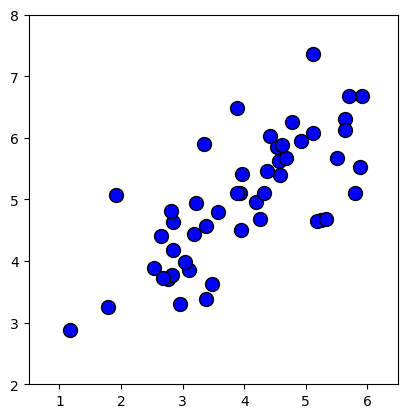

In [ ]:
# Cargue los datos en la variabla X
data = loadmat(os.path.join('Data', 'ex7data1.mat'))
X = data['X']

#  Visualice los datos
pyplot.plot(X[:, 0], X[:, 1], 'bo', ms=10, mec='k', mew=1)
pyplot.axis([0.5, 6.5, 2, 8])
pyplot.gca().set_aspect('equal')
pyplot.grid(False)

<a id="section3"></a>
### 2.2 Implementación de PCA

In esta parte usted implementará PCA. PCA consiste de 2 etapas.

1. Calcular la matriz de covarianza de los datos.
2. Usar SVD (en Python usamos la función de NumPy `np.linalg.svd`) para calcular los autvectores $U_1$, $U_2$, $\dots$, $U_n$. Estos corresponden a las componentes principales de variación en los datos.

Inicialmente usted debe calcular la matriz de covarianza de los
datos, la cual está data por

$$ \Sigma = \frac{1}{m} X^T X$$

donde $X$ corresponde a la matriz de datos (cada dato es una fila), y $m$ es el número de datos.  Note que $\Sigma$ es una matriz de tamaño $n \times n$
y no el operador suma

.

Luego de calcular la matriz de covarianza usted puede correr la descomposición

  SVD para calcular las componentes principales. En Python y  `numpy` (o `scipy`),
usted puede correr SVD con el siguiente comando: `U, S, V = np.linalg.svd(Sigma)`, donde `U` contiene las componentes principales y `S` contiene la matriz diagonal. Note que la librería  `scipy` tiene funciones similares para calcular la descomposición SVD `scipy.linalg.svd`. Las funciones en las dos librerías usan el mismo código basado en la librería en C (LAPACK) para la implementación SVD, sin embargo la versión `scipy`
proporciona más opciones y argumentos para controlar el cálculo de SVD.
En este ejercicio nos mantenemos en `numpy` para la implementación de SVD.

Complete el código en la siguiente celda para implementar PCA.

<a id="pca"></a>

## Advertencia! : Lo que en este proyecto se llama U es realmente V como lo discutimos en clase.

In [ ]:
def pca(X):
    """
    Corra PCA

    Parametros
    ----------
    X : arreglo
        Los datos para usar con PCA. Las dimensiones son (m x n)
        donde m es el número de muestras (observaciones) y n es
        el número de atributos.


    Returna
    -------
    U : arreglo
        Los autovectores. Representan las componentes principales
        de X, U con dimensiones (n x n) donde cada columna es una
        componente principal.

    S : arreglo
        Un vector de tamaño n, con los valores singulares para cada
        componente. Note que esta es la matriz diagonal mencionada
        en clase.

    Instrucciones
    ------------
    Debe calcular primero la matriz de covarianza. Luego debe
    usar la función "svd" para calcular los autovectores y
    autovalores de la matriz de convarianza.

    Notas
    -----
    Recuerde dividir por m cuando calcule la matriz de covarianza,
    donde m es el número de muestras.
    """
    # valores útiles
    m, n = X.shape

    # necesita retornar las siguientes variables
    U = np.zeros(n)
    S = np.zeros(n)

    # ====================== Su Código Acá ======================

    sigma = 1/m*(X.T.dot(X))
    U, S, V = np.linalg.svd(sigma)

    # ============================================================
    return U, S

Antes de calcular PCA es importante normalizar los datos, restando el valor medio de cada atributo de los datos y escalando cada dimension de forma que los datos esten en el mismo rango.

En la siguiente celda la normalización se ejecuta mediante el uso de
la función `utils.featureNormalize` .
Luego de normalizar los datos puede correr PCA para calcular las
componentes principales. Su tarea es completar el código `pca`
para calcular las componentes principlaes de los datos.

Una vez halla completado la función `pca`, la celda siguiente corre el
análisis PCA en el los datos y grafica las componentes principales encontradas en la figura de abajo.

![](Figures/pca_components.png)

La siguiente celda tambien muestra la componente principal (autovector)
encontrada y debe observar la salida `[-0.707 -0.707]`. (Es posible que
`numpy`  pueda arrojar, en vez,  el negativo de este vector, since tanto
$U_1$ como $-U_1$  son igualmente válidas para la componente principal.

Top eigenvector: U[:, 0] = [-0.707107 -0.707107]
 (you should expect to see [-0.707107 -0.707107])


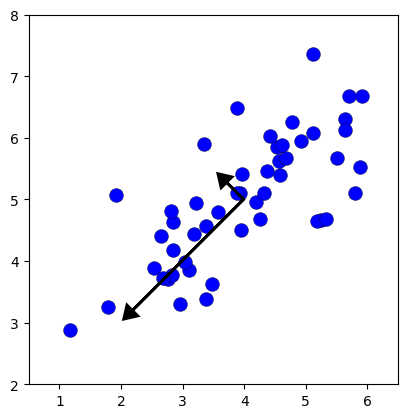

In [ ]:
#  Antes de correr el PCA es importante normalizar los datos
X_norm, mu, sigma = utils.featureNormalize(X)

#  Corra PCA
U, S = pca(X_norm)

#  Grafique las direcciones de máxima variación de los datos.
#  Grafique los autovectores centrados en la media de los datos.
#  Estas líneas muestran las direcciones de máxima variación de los datos.

fig, ax = pyplot.subplots()
ax.plot(X[:, 0], X[:, 1], 'bo', ms=10, mec='k', mew=0.25)

for i in range(2):
    ax.arrow(mu[0], mu[1], 1.5 * S[i]*U[0, i], 1.5 * S[i]*U[1, i],
             head_width=0.25, head_length=0.2, fc='k', ec='k', lw=2, zorder=1000)

ax.axis([0.5, 6.5, 2, 8])
ax.set_aspect('equal')
ax.grid(False)

print('Top eigenvector: U[:, 0] = [{:.6f} {:.6f}]'.format(U[0, 0], U[1, 0]))
print(' (you should expect to see [-0.707107 -0.707107])')

### 2.3 Reducción de dimensionalidad mediante PCA

Luego de calcular las componentes principales, las puede usar para
reducir la dimension de atributos de los datos mediante la proyección
de las muestras a un espacio de  dimensión más pequeña , $x^{(i)} \rightarrow z^{(i)}$ (por ejemplo, proyectando los datos de 2D a 1D).
In esta parte del ejercicio usted usará los autovectores retornados
por PCA y proyectará los datos a un espacio de una dimensión. En la práctica, si usted usa un algoritmo de aprendizaje tal como regresión lineal o redes neuronales, puede usar ahora los datos proyectados, en vez de los originales.  Mediante el uso de los datos proyectados, usted puede entrenar su modelo mas rápido puesto que tiene un número más pequeño de dimensiones.
<a id="section4"></a>

#### 2.3.1 Proyección de los datos originales en las componentes principales.

Ahora debe completar el código en la función `projectData`.
Específicamente, dado un conjunto `X`, las componentes principales
`U`, y el número deseado de dimensiones `K`, debes proyectar
aca muestra en `X` en las  `K` components mayores de `U`.
Note que las `K` components mayores de `U` estan daas por

`Ureduce = U[:, :K]`.
<a id="projectData"></a>

In [ ]:
def projectData(X, U, K):
    """
    Calcula los datos reducidos proyectando los datos originales
    a lo largo de los K autovectores más importantes.

    Parámetros
    ----------
    X : arreglo
        Los datos de entrada tienen dimensiones (m x n). Se asumen
        normalizados.

    U : arreglo
        Los autovectores se calculan usando PCA. Esto produce
        una matriz de dimensiones (n x n). Cada columna de la matriz
        representa un autovector (o componente principal).

    K : int
        Número de dimensiones del espacio proyectado. Debe ser menor que n.

    Returns
    -------
    Z : arreglo
        La proyeccion de los datos de acuerdo a los K autovectores más significativos.
        Esta debe ser una matriz de orden (m x k).

    Instrucciones
    ------------
    Calcule la proyección de los datos sobre los K
    autovectores mas importantes (con los mayores valores singulares)
    de la matriz U ( las primeras K columnas, poroducen W en las notas de clase).
    Para la muestra i, es decir X[i,:[, la proyección en el autovector  k
    esta dada por:


        x = X[i, :]
        projection_k = np.dot(x,  U[:, k])

    """
    # debe retornar la siguiente variable correctamente
    Z = np.zeros((X.shape[0], K))

    # ====================== Su Còdigo Acá ======================

    Z = np.dot(X,  U[:, :K])

    # =============================================================
    return Z

Una vez halla completado su código en  `projectData`, verifique que la pròxima celda proyecte la primera muestra de la primera dimensión y debería observar un valor de 1.481
(o posiblemente -1.481, si usa $-U_1$ en vez de $U_1$.

In [ ]:
#  Proyecte los datos a la primera dimensión.
K = 1
Z = projectData(X_norm, U, K)
print('Projection of the first example: {:.6f}'.format(Z[0, 0]))
print('(this value should be about    : 1.481274)')

Projection of the first example: 1.481274
(this value should be about    : 1.481274)


<a id="section5"></a>
#### 2.3.2 Reconstrucción aproximada de los datos

Luego de haber proyectado sus datos en un espacio de baja dimensión, debe aproximar una reconstrucción de los datos  proyectándolos al espacio original
de altas dimensiones. Su tarea es completar la función `recoverData` que proyecta cada muestra en `Z` al espacio original recobrado en  `Xrec`.
<a id="recoverData"></a>

In [ ]:
def recoverData(Z, U, K):
    """
    Recobra una aproximación a los datos originales usando
    los datos proyectados.

    Parámetros
    ----------
    Z : arreglo
        Los datos reducidos mediante PCA. Esta es una matriz
        de dimensiones (m x K ).

    U : arreglo
        Los autovectores (componentes principales) calculados mediante PCA.
        Esta es una matriz de tamaño (n x n) donde las columnas representan
        autovectores de la matriz de covarianza.

    K : int
        El número de componentes principales que se quiera retener.
        (debe ser menor que n)

    Retorna
    -------
    X_rec : arreglo
        Los datos recobrados luego de transformar los datos proyectados
        al espacio original. Esta matriz es de tamaño (m x n), donde
        m es el número de muestras y n es la dimensión del espacio
        (nùmero de atributos de los datos originales)

    Instrucciones
    ------------
    Calcule la aproximaciòn de los datos mediante la proyección
    inversa al espacio orignal usando los K autovectores principales
    de U (los primeros).  Para la muestra i, es decir Z[i, :], los
    datos aproximados (recobrados) está dado por

        v = Z[i, :]
        recovered_j = np.dot(v, U[j, :K])


    Note que  U[j, :K] es un vector de tamaño K.
    """
    # Debe retornar la siguiente variable correctamente
    X_rec = np.zeros((Z.shape[0], U.shape[0]))

    # ====================== Su Código Acá ======================

    X_rec = Z.dot(U[:, :K].T)

    # =============================================================
    return X_rec

Una vez halla compledado su código en  `recoverData`, la siguiente celda recorba la aproximación de la primera muestra , la cual debe tener un valor cercano a  `[-1.047 -1.047]`.  Su cógigo debe graficar
los datos en este espacio reducido.   Esto te muestra como deben lucir los datos luego del uso de los correspondientes autovalores que los construyen. Un ejemplo de como la proyección PCA debe lucir sse
muestra en la siguiente figura:



![](Figures/pca_reconstruction.png)


En la figura de arriba los puntos originales se indican con círculos azules, mientras que los datos proyectados se indican con círculos rojos. La proyección efectivamente retiene la información
en la dirección $U_1$. Las lineas punteadas muestran las distancias desde los puntos en el espacio original hasta el espacio proyectado. Estos lineas punteadas representan el error debdido
a la proyección PCA.

Approximation of the first example: [-1.047419 -1.047419]
       (this value should be about  [-1.047419 -1.047419])


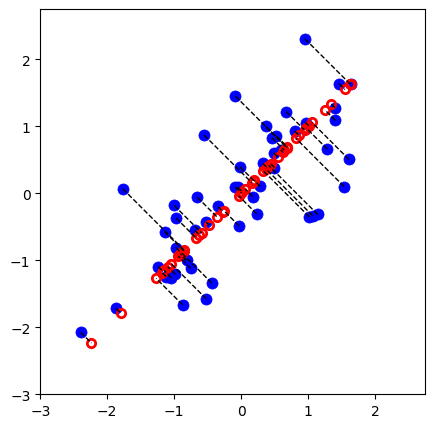

In [ ]:
X_rec  = recoverData(Z, U, K)
print('Approximation of the first example: [{:.6f} {:.6f}]'.format(X_rec[0, 0], X_rec[0, 1]))
print('       (this value should be about  [-1.047419 -1.047419])')

#  Grafique los datos normalizados (retornados de featureNormalize)

fig, ax = pyplot.subplots(figsize=(5, 5))
ax.plot(X_norm[:, 0], X_norm[:, 1], 'bo', ms=8, mec='b', mew=0.5)
ax.set_aspect('equal')
ax.grid(False)
pyplot.axis([-3, 2.75, -3, 2.75])

# Dibuje las líneas que conectan los puntos proyectados a los puntos originaes.
ax.plot(X_rec[:, 0], X_rec[:, 1], 'ro', mec='r', mew=2, mfc='none')
for xnorm, xrec in zip(X_norm, X_rec):
    ax.plot([xnorm[0], xrec[0]], [xnorm[1], xrec[1]], '--k', lw=1)

### 2.4 Datos de imagenes de caras

En esta parte del ejercicio, usted debe correr PCA en las imagenes de caras para ver como se usa el algoritmo en la práctica con el fin de reducir dimensionalidad.  Los datos `ex7faces.mat` contienen las muestras que se almacenan en la matriz `X` con las imágenes de las caras, cada imagen de tamaño $32 \times 32$ en escala de grises.  Los datos se basan en [cropped version](http://conradsanderson.id.au/lfwcrop/) del conjunto [labeled faces in the wild](http://vis-www.cs.umass.edu/lfw/). Cada fila de `X` corresponde a una cara de la imagen de caras (un vector de longitud 1024).


La pròxima celda carga y visualiza las primeras 100 caras. Deben lucir similares a esta figura:
![Faces](Figures/faces.png)


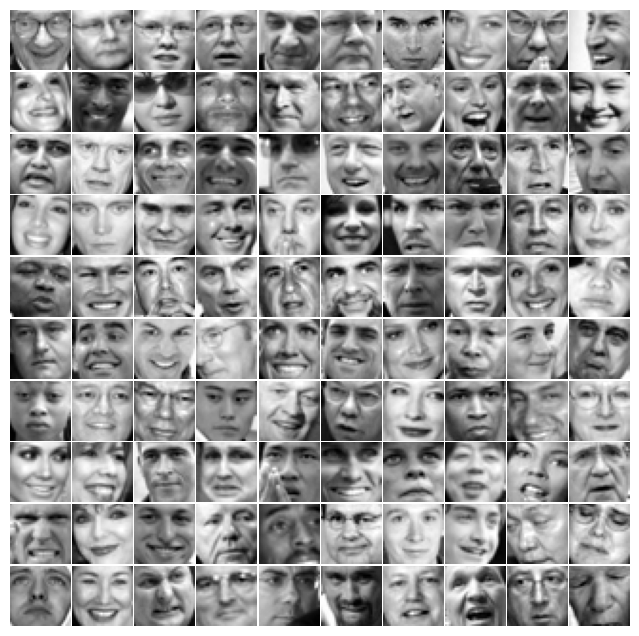

In [ ]:
#  Cargue los datos con las caras
data = loadmat(os.path.join('Data', 'ex7faces.mat'))
X = data['X']

#  Muestre las primeras 100 caras.
utils.displayData(X[:100, :], figsize=(8, 8))

#### 2.4.1 PCA en Caras

Para correr el PCA en los datos de caras, inicialmente noramlizamos los datos, retando la media de cada atributo en la matriz `X`. Luego de correr el algoritmo
de PCA usted debe obtener las componentes principales. Note que cada componente princial en  `U` (cada columna) es un vector de longitud

To run PCA on the face dataset, we first normalize the dataset by subtracting the mean of each feature from the data matrix `X`.  After running PCA, you will obtain the principal components of the dataset. Notice that each principal component in `U` (each column) is a vector of length $n$ (where for the face dataset, $n = 1024$). It turns out that we can visualize these principal components by reshaping each of them into a $32 \times 32$ matrix that corresponds to the pixels in the original dataset.

The following cell will first normalize the dataset for you and then run your PCA code. Then, the first 36 principal components (conveniently called eigenfaces) that describe the largest variations are displayed. If you want, you can also change the code to display more principal components to see how they capture more and more details.

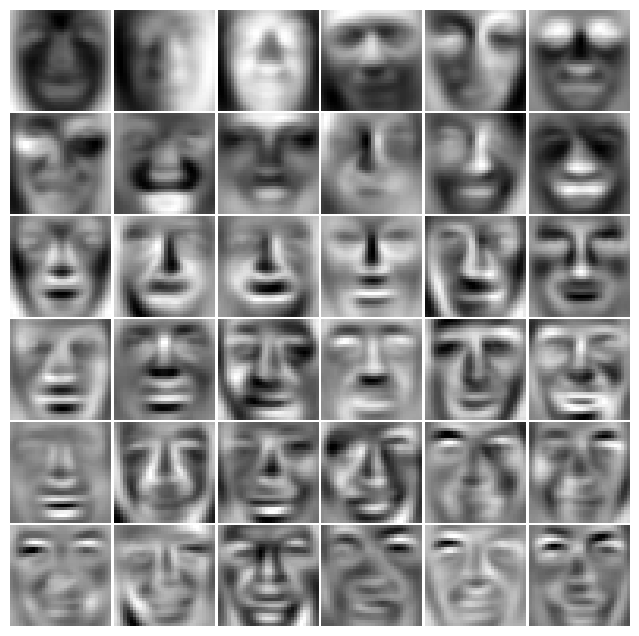

In [ ]:
#  normalice X restando la media de cada atributo
X_norm, mu, sigma = utils.featureNormalize(X)

#  Corra PCA
U, S = pca(X_norm)

#  Visualice las primeras 36 autovalores encontrados
utils.displayData(U[:, :36].T, figsize=(8, 8))

#### 2.4.2 Reducción de dimensionalidad

Ahora que ya se tienen las componentes principales de los datos, se pueden usar para reducir la dimension de los mismos. Esto permite
que su algoritmo aprenda con un conjunto con datos de menor tamaño (por ejemplo 100 dimensiones) en vez de la dimension original de 1024.
Esto puede ayudar a incrementar la velocidad en el algoritmo de aprendizaje.

La pròxima celda proyecta los datos de las caras a las primeras 100 componentes principales. Concretamente, cada imagen de cara se describe
por el vector $z^{(i)} \in \mathbb{R}^{100}$. Para entender que se pierde en la reducciòn de dimensionalidad, puede recobrar los datos usando
solo los datos proyectados.


In [ ]:
#  Proyecte las imagenes en el autoespacio usando los k autovectores principales
K = 100
Z = projectData(X_norm, U, K)

print('The projected data Z has a shape of: ', Z.shape)

The projected data Z has a shape of:  (5000, 100)


La próxima celda aproxima los datos recobrados usando los datos proyectados. Se muestran
los datos originales y los recobrados de forma similar a la mostrada acá.

<table>
    <tr>
        <td><img src="Figures/faces_original.png" width="300"></td>
        <td><img src="Figures/faces_reconstructed.png" width="300"></td>
    </tr>
</table>

De la reconstruccion se observa que en general la estructura y apariencia de las caras se conserva, salvo pequeños detalles. Esta es una reducción
importante (mas de 10x) en el tamaño de los datos que puede ayudar a mejorar la velocidad de aprendizaje significativamente. Por ejemplo, si usted
esta entrenando una red neuronal para reconocimiento de caras, usted puede usar los datos reducidos a 100 dimensiones en vez de las dimensiones
representadas por los pixeles originales.

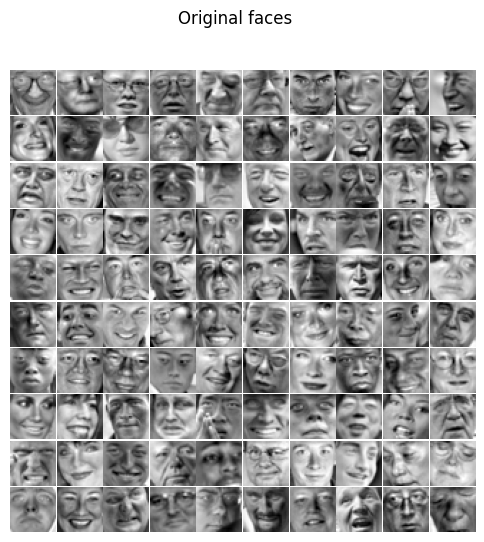

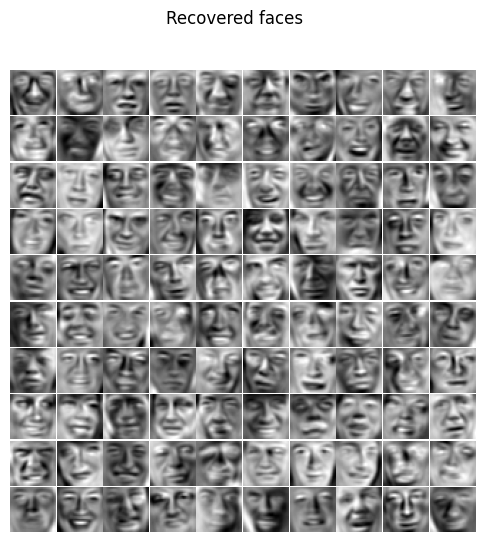

In [ ]:
#  Poryecte las imagenes al autoespacio usando los primeros K autovectores y
#  visualice solo las primeras K dimensiones
#  compare con la entrada original, que se muestra
K = 100
X_rec  = recoverData(Z, U, K)

# muestre los datos normalizados
utils.displayData(X_norm[:100, :], figsize=(6, 6))
pyplot.gcf().suptitle('Original faces')

# Display reconstructed data from only k eigenfaces
# muestre los datos reconstruidos solo ocn k autovectores
utils.displayData(X_rec[:100, :], figsize=(6, 6))
pyplot.gcf().suptitle('Recovered faces')
pass

### 2.5 Ejercicio opcional para visualizacion con PCA. No se califica.
En el ejercicio anterior de K-means se usó k-means en un espacio 3-dimensional RGB. Redujimos cada pixel de la imagen RGB para ser representado
paor 16 grupos (clusters). En la próxima celda, mostramos un código para visualizar las asignaciones de pixeles finales en el espacio 3D.
Cada punto es coloreado de acuerdo al grupo en el que fue clasificado. Usted puede arrastar el ratón en la figura para rotar e inspeccionar los datos en
3 dimensiones.


In [ ]:
# Esto permite interactividad para rotar la gráfic 3D
# La repetición de la linea de código se hace a propósito
# ver: https://stackoverflow.com/questions/43545050/using-matplotlib-notebook-after-matplotlib-inline-in-jupyter-notebook-doesnt
%matplotlib notebook
%matplotlib notebook
from matplotlib import pyplot


A = mpl.image.imread(os.path.join('Data', 'bird_small.png'))
A /= 255
X = A.reshape(-1, 3)

# ejecute el agrupamiento K'means acá.
K = 16
max_iters = 10
initial_centroids = kMeansInitCentroids(X, K)
centroids, idx = utils.runkMeans(X, initial_centroids,
                                 findClosestCentroids,
                                 computeCentroids, max_iters)

#  Escoja 1000 muestras aleatorias, debido a que trabajar con todos
#  los datos es costoso.  Si tiene un computador rápido puede incrementar
#  esto.
sel = np.random.choice(X.shape[0], size=1000)

fig = pyplot.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[sel, 0], X[sel, 1], X[sel, 2], cmap='rainbow', c=idx[sel], s=8**2)
ax.set_title('Pixel dataset plotted in 3D.\nColor shows centroid memberships')
pass

<IPython.core.display.Javascript object>

La visualización de datos en 3 dimensiones o más es complicada. Por eso, es mejor visualizar datos en 2D, aún si se pierde una dimensión.
En la práctica, PCA se usa para reducir la dimensionalidad y permitir una mejor visualización.

La próxima celda aplica la implementación de PCA en un conjunto de 3 dimensiones para reducirlo a 2 dimensiones y visualizar el resultado en una
gráfica tipo ¨scatter plot¨ 2D. La proyección PCA puede entenderse como una rotación que selecciona la vista donde los datos están mayormente
regados. Esta sería la "mejor" visualización.


<IPython.core.display.Javascript object>

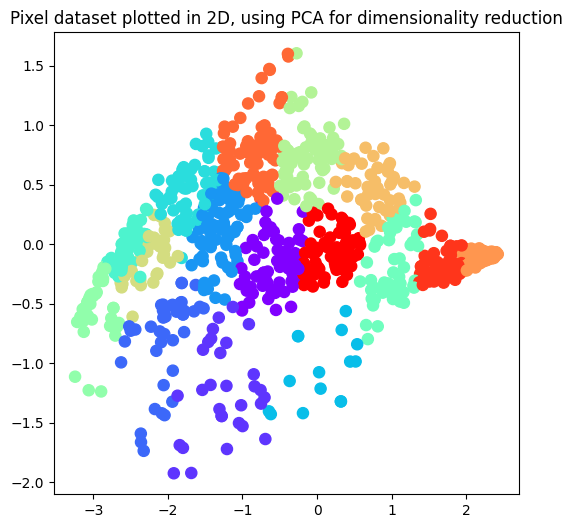

In [ ]:
# reste la media para normalizar
X_norm, mu, sigma = utils.featureNormalize(X)

# use PCA para proyectar a 2D
U, S = pca(X_norm)
Z = projectData(X_norm, U, 2)

# Reseté matplotlib para que sea no interactivo
%matplotlib inline

fig = pyplot.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ax.scatter(Z[sel, 0], Z[sel, 1], cmap='rainbow', c=idx[sel], s=64)
ax.set_title('Pixel dataset plotted in 2D, using PCA for dimensionality reduction')
ax.grid(False)
pass